<a href="https://colab.research.google.com/github/FranciscaHM/Proyecto/blob/main/Datos_estrella_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import scipy as sp
import astropy as ap
import pandas as pd
import seaborn as cbrn
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from amuse.units import units
from amuse.io import read_set_from_file

In [1]:
pip install amuse-framework

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.2/679.2 kB 17.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools_scm-8.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools_scm-8.1.0-py3-none-any.whl (43 kB)
  Created wheel for amuse-framework: filename=amuse_framework-2024.6.0-py3-none-any.whl size=629891 sha256=33d491e8df5ba36ad7d6de7e9fcff4aed1085f9d26db2d36e57b2d8d87226ece
  Stored in directory: /root/.cache/pip/wheels/96/a7/96/08b4505f65a31c950a9ef03d5cf092aaa1b151d1bdd9b30503
Successfully built amuse-framework


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Empezamos la visualización de datos:

In [11]:
#Primero guardamos todos los datos.
path_carpeta = '/content/drive/MyDrive/sim'
stars = []
gas = []
for i in range(1,91):
  stars.append(path_carpeta+f'/stars_{i}')
  gas.append(path_carpeta+f'/gas_{i}')

  #Ahora los abrimos con amuse:
  gas_path = '/content/drive/MyDrive/sim/gas_1'
  gas_1 = read_set_from_file(filename = gas_path, format = 'hdf5')

star_data = []
for elemento in stars:
  star_data.append(read_set_from_file(filename = elemento, format = 'hdf5'))

gas_data = []
for elemento in gas:
  gas_data.append(read_set_from_file(filename = elemento, format = 'hdf5'))

Tomemos un elemento y lo analizamos:

In [15]:
help(star_data[0])

Help on Particles in module amuse.datamodel.particles object:

class Particles(AbstractParticleSet)
 |  Particles(size=0, storage=None, keys=None, keys_generator=None, particles=None, is_working_copy=True, **attributes)
 |  
 |  A set of particles. Attributes and values are stored in
 |  a private storage model. This storage model can store
 |  the values in the python memory space, in the memory space
 |  of the code or in a HDF5 file. By default the storage
 |  model is in memory.
 |  
 |  Method resolution order:
 |      Particles
 |      AbstractParticleSet
 |      amuse.datamodel.base.AbstractSet
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, index)
 |  
 |  __init__(self, size=0, storage=None, keys=None, keys_generator=None, particles=None, is_working_copy=True, **attributes)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  add_particles_to_store(self, keys, attributes=[], values=[])
 |  
 |

In [51]:
print('Datos estrella: \n')
star_data[0].all_attributes()

print('Datos gas: \n')
gas_1.all_attributes()

Datos estrella: 

Datos gas: 



['key',
 'ax',
 'ay',
 'az',
 'density',
 'du_dt',
 'epsilon',
 'h_smooth',
 'mass',
 'num_neighbours',
 'pressure',
 'radius',
 'rho',
 'u',
 'vx',
 'vy',
 'vz',
 'x',
 'y',
 'z',
 'mass_segregation_Gini_coefficient',
 'total_mass',
 'nearest_neighbour',
 'add_spin',
 'total_angular_momentum',
 'potential_energy',
 'specific_kinetic_energy',
 'center_of_mass',
 'potential',
 'virial_radius',
 'box_counting_dimension',
 'thermal_energy',
 'get_binaries',
 'cluster_core',
 'find_closest_particle_to',
 'new_particle_from_cluster_core',
 'mass_segregation_from_nearest_neighbour',
 'move_to_center',
 'Qparameter',
 'velocity',
 'angular_momentum',
 'rotate',
 'scale_to_standard',
 'connected_components',
 'natal_kick_velocity',
 'acceleration',
 'position',
 'minimum_spanning_tree_length',
 'bound_subset',
 'distances_squared',
 'LagrangianRadii',
 'kinetic_energy',
 'correlation_dimension',
 'total_momentum',
 'mass_segregation_ratio',
 'dynamical_timescale',
 'densitycentre_coreradius_co

1. Lagrangian Radii

In [28]:
starRadii = []
for i in range(0,len(star_data)):
  starRadii.append(star_data[i].LagrangianRadii)


starDensity = []
for i in range(0,len(star_data)):
  starDensity.append(star_data[i].densitycentre_coreradius_coredens)

starXMotion = []
for i in range(0,len(star_data)):
  starXMotion.append(star_data[i].x)

In [76]:
from re import M
xs1= star_data[0].x.value_in(units.m)
ys1= star_data[0].y.value_in(units.m)
zs1= star_data[0].z.value_in(units.m)

xg1= gas_data[0].x.value_in(units.m)
yg1= gas_data[0].y.value_in(units.m)
zg1= gas_data[0].z.value_in(units.m)

#Vamos a trabajar en unidades de masa solar.
#Para la estrella 1:
ms1 = star_data[0].mass.value_in(units.MSun)
mTots1 = star_data[0].total_mass().value_in(units.MSun)
centerMs1 = star_data[0].center_of_mass().value_in(units.m)
segRatMs1 = star_data[0].mass_segregation_ratio()
print(segRatMs1)

#Para el gas uno:
mg1 = gas_data[0].mass.value_in(units.MSun)
mTotg1 = gas_data[0].total_mass().value_in(units.MSun)
centerMg1 = gas_data[0].center_of_mass().value_in(units.m)
segRatMg1 = gas_data[0].mass_segregation_ratio()

1.32621025755


In [34]:
help(x)

Help on VectorQuantity in module amuse.units.quantities object:

class VectorQuantity(Quantity)
 |  VectorQuantity(array, unit)
 |  
 |  A VectorQuantity object represents a physical vector
 |  quantity.
 |  
 |  >>> from amuse.units import units
 |  >>> v1 = [0.0, 1.0, 2.0] | units.kg
 |  >>> v2 = [2.0, 4.0, 6.0] | units.kg
 |  >>> v1 + v2
 |  quantity<[2.0, 5.0, 8.0] kg>
 |  >>> len(v1)
 |  3
 |  
 |  Method resolution order:
 |      VectorQuantity
 |      Quantity
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, index)
 |      Return the "index" component as a quantity.
 |      
 |      :argument index: index of the component, valid values
 |          for 3 dimensional vectors are: ``[0,1,2]``
 |      :returns: quantity with the same units
 |      
 |      >>> from amuse.units import si
 |      >>> vector = [0.0, 1.0, 2.0] | si.kg
 |      >>> print vector[1]
 |      1.0 kg
 |      >>> print vector[0:2]
 |      [0.0, 1.0] kg
 |      >>> print vector[[

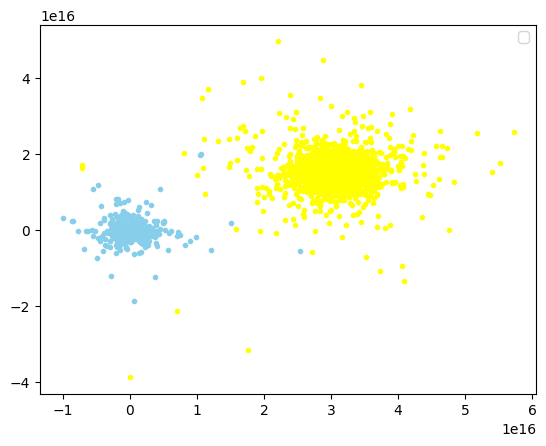

In [78]:
plt.plot(xs1,ys1, '.', color='skyblue')
plt.plot(centerMs1[0],segRatMs1, color='blue')
plt.plot(xg1,yg1, '.', color='yellow')
plt.plot(centerMg1[0],centerMg1[1], color='red')
plt.legend()
plt.show()

Veamos los centros de masa.

In [83]:
CMstars = []
for i in range(0,len(star_data)):
  CMstars.append(star_data[i].center_of_mass())

x = []
for i in range(0,len(star_data)):
  x.append(star_data[i].x)

CMgas = []
for i in range(0,len(gas_data)):
  CMgas.append(gas_data[i].center_of_mass())

x = []
for i in range(0,len(gas_data)):
  x.append(gas_data[i].x)
